# Iudin Artyom BVT2101

In [1]:
import pandas as pd
import seaborn as sns # for 7 task

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("/kaggle/input/titanic/train.csv", index_col="PassengerId")
df.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
385,0,3,"Plotcharsky, Mr. Vasil",male,NaN,0,0,349227,7.8958,NaN,S
518,0,3,"Ryan, Mr. Patrick",male,NaN,0,0,371110,24.1500,NaN,Q
444,1,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0000,NaN,S
720,0,3,"Johnson, Mr. Malkolm Joackim",male,33.0,0,0,347062,7.7750,NaN,S
400,1,2,"Trout, Mrs. William H (Jessie L)",female,28.0,0,0,240929,12.6500,NaN,S
386,0,2,"Davies, Mr. Charles Henry",male,18.0,0,0,S.O.C. 14879,73.5000,NaN,S
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
434,0,3,"Kallio, Mr. Nikolai Erland",male,17.0,0,0,STON/O 2. 3101274,7.1250,NaN,S
609,1,2,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",female,22.0,1,2,SC/Paris 2123,41.5792,NaN,C


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


# 1. Man/Woman

In [3]:
df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

- Female - 314
- Male - 577

# 2. Pclass distribution

In [4]:
pd.crosstab(df.Sex, df.Pclass)

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [5]:
print(f"There were {pd.crosstab(df.Sex, df.Pclass).loc['male'][2]} men in 2 class")

There were 108 men in 2 class


# 3. Median and Deviation of Fare

In [6]:
print(f"Fare's median = {df.Fare.median():.2f}, and deviation = {df.Fare.std():.2f}")

Fare's median = 14.45, and deviation = 49.69


# 4. Middle age vs old one

In [7]:
survived = df[df.Survived == 1]

if (len(survived[survived.Age < 30]) / len(df)) > (len(survived[survived.Age > 60]) / len(df)):
    print("Yes, it was true that people younger than 30 had more chances to survive")
else:
    print("No, it was a myth")
    
print(f"For younger than 30 chances to survive {len(survived[survived.Age < 30]) / len(df):.2f}")
print(f"For older than 60 - {len(survived[survived.Age > 60]) / len(df):.2f}")

Yes, it was true that people younger than 30 had more chances to survive
For younger than 30 chances to survive 0.18
For older than 60 - 0.01


# 5. Woman vs Man

In [8]:
if df.groupby('Sex').Survived.mean()['female'] > df.groupby('Sex').Survived.mean()['male']:
    print("It was true")
else:
    print("It was a myth")
    
print(f"Female chances = {df.groupby('Sex').Survived.mean()['female']:.2f},\
 male chances = {df.groupby('Sex').Survived.mean()['male']:.2f}")

It was true
Female chances = 0.74, male chances = 0.19


# 6. Most popular male name

In [9]:
print(f"Most popular male name = {df[df['Sex'] == 'male'].Name.mode()[0]}")

Most popular male name = Abbing, Mr. Anthony


# 7. Fare and Age distribution

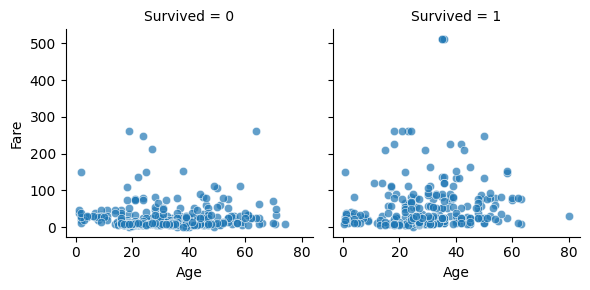

In [10]:
g = sns.FacetGrid(df, col="Survived")
g.map(sns.scatterplot, "Age", "Fare", alpha=0.7)

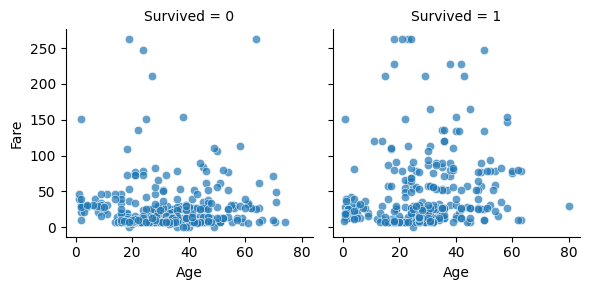

In [11]:
cutted_df = df[df['Fare'] < 300]
g = sns.FacetGrid(cutted_df, col="Survived")
g.map(sns.scatterplot, "Age", "Fare", alpha=0.7)

It's a rich man's world

In [12]:
ages = df.groupby('Survived').Age.mean()

if (ages[0] > ages[1]):
    print(f"Yes, survived were younger in mean, {ages[0]:.2f} vs {ages[1]:.2f}")
else:
    print(f"Yes, survived were older in mean, {ages[0]:.2f} vs {ages[1]:.2f}")

Yes, survived were younger in mean, 30.63 vs 28.34


# 8. Male/Female and classes

In [15]:
sex_classes = df.groupby(['Sex', 'Pclass']).Age.mean()
print(f"- {sex_classes.loc['male', 1] > 40} - \
mean male age for the 1 Class is more than 40")

print(f"- {sex_classes.loc['female', 1] > 40} - \
mean female age for the 1 Class is less than 40")

print("-",
    (sex_classes.loc['female', 1] < sex_classes.loc['male', 1] and
     sex_classes.loc['female', 2] < sex_classes.loc['male', 2] and
     sex_classes.loc['female', 3] < sex_classes.loc['male', 3]), 
     "- in all classes men are older than women")

print("-",
    ((sex_classes.loc['female', 1] + sex_classes.loc['male', 1]) > 
     (sex_classes.loc['female', 2] + sex_classes.loc['male', 2]) and
     (sex_classes.loc['female', 2] + sex_classes.loc['male', 2]) > 
     (sex_classes.loc['female', 3] + sex_classes.loc['male', 3])), 
     "- less class - more age")


- True - mean male age for the 1 Class is more than 40
- False - mean female age for the 1 Class is less than 40
- True - in all classes men are older than women
- True - less class - more age
